# Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Functions

In [2]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

# Import file

In [3]:
df = pd.read_csv('dataset/2020-Apr.csv', na_values="")

pd.set_option('display.max_rows', 100)

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


## Get sample from dataset 

In [4]:
#df_sample: DataFrame = df.sample(frac=0.01, replace = False)
#df_sample.head(50)

df: DataFrame = df.sample(frac=0.6, replace = False)
df.head(50)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
40948567,2020-04-21 08:08:06 UTC,view,100081778,2053013554658804075,electronics.audio.headphone,lenovo,298.33,585198061,8f36d64b-8131-4b4f-888d-a5528c42416e
49086412,2020-04-24 11:37:29 UTC,view,5301764,2232732089269092627,NaN,rowenta,692.40,622952857,7f9dc21b-54d6-4e49-8fe8-041bbfb114f7
26419578,2020-04-15 12:37:58 UTC,view,16800230,2053013563970159485,appliances.kitchen.refrigerators,NaN,51.22,641875545,d1d585b5-4d11-4990-90d1-f01ce6740f84
28582646,2020-04-16 09:37:20 UTC,view,18700010,2232732100056842769,appliances.personal.massager,sv,586.63,512741179,27c8b9bd-e9b4-4a1d-ac18-3b71be410eaf
1442923,2020-04-01 18:55:18 UTC,view,4802354,2232732079706079299,sport.bicycle,xiaomi,82.85,635513590,c534a91d-a950-4993-a372-58c3f25673e9
55874550,2020-04-26 21:36:02 UTC,view,15700080,2232732094134485388,NaN,NaN,386.08,612983344,a1f0a470-42bf-49df-8c79-d391144f0a52
36483549,2020-04-19 09:28:03 UTC,view,19800041,2053013559733912211,apparel.trousers,gerber,1.15,513793810,40fb478e-40b6-4f82-ac3a-dd89d33419c7
63162783,2020-04-29 16:21:01 UTC,view,1003312,2232732093077520756,construction.tools.light,apple,751.63,582557918,fea65015-93bc-4fdd-98ff-e07d948c5346
14575307,2020-04-09 21:41:35 UTC,view,100001988,2232732107883414193,electronics.audio.acoustic,adagio,94.98,638979430,e9ebbdd3-ff31-47fe-9594-9fba23d6497a
15678998,2020-04-10 12:43:46 UTC,view,5301580,2232732089269092627,NaN,scarlett,10.04,594842578,a4cf8bfe-9456-4f75-a104-082713ab9523


## Get Cleaned Dataset Before Data Profiling

In [24]:
# Create new columns based on the column category_based
df_sample['category_code_lvl_1'] = df_sample['category_code'].str.split(".").str[0] #Obter o 1º nivel do category code e criar nova coluna
df_sample['category_code_lvl_2'] = df_sample['category_code'].str.split(".").str[1] #Obter o 2º nivel do category code e criar nova coluna
df_sample['category_code_lvl_3'] = df_sample['category_code'].str.split(".").str[2] #Obter o 3º nivel do category code e criar nova coluna

#create column target based on the event_type column
#when event_type=purchase => purchase
#     event_type != purchase => not_purchase 

df_sample['target'] = 'not_purchase'  # Definindo valor padrão
df_sample.loc[df['event_type']=='purchase', 'target'] = 'purchase'

df_sample.head(50)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,target
5810122,2020-04-04 14:38:15 UTC,view,6500400,2232732103462617687,apparel.shoes.slipons,asrock,63.06,636440530,a2a3513a-b22f-4c62-a24f-0fcf8011b690,apparel,shoes,slipons,not_purchase
34680881,2020-04-18 14:31:32 UTC,view,2701760,2232732091718566220,appliances.kitchen.refrigerators,NaN,630.62,512563369,e4952d4c-b1b6-4ee4-84ae-3fd0c1bffc09,appliances,kitchen,refrigerators,not_purchase
10608103,2020-04-07 15:59:32 UTC,view,1004748,2232732093077520756,construction.tools.light,huawei,125.36,631301455,86b27826-973d-4d5e-93eb-aa6db344c946,construction,tools,light,not_purchase
7240849,2020-04-05 13:30:22 UTC,view,35108554,2053013555573162395,electronics.telephone,milavitsa,17.19,594938231,a52133bb-8678-4fd3-beee-6d548bef90a7,electronics,telephone,NaN,not_purchase
42252516,2020-04-21 17:28:23 UTC,view,14701260,2053013552570040549,electronics.video.projector,NaN,174.78,522197098,920a5fa2-2e2d-43e4-a1c1-d880a585f069,electronics,video,projector,not_purchase
40656298,2020-04-21 05:58:23 UTC,cart,12709747,2053013553199186187,NaN,hifly,63.06,644770516,c5ebb4ef-e5ce-4540-bae5-28be7771b8b9,NaN,NaN,NaN,not_purchase
6736020,2020-04-05 08:10:33 UTC,view,2702347,2232732091718566220,appliances.kitchen.refrigerators,lg,554.17,577255563,dafd4a3f-3818-4d0a-af35-17d829f94d38,appliances,kitchen,refrigerators,not_purchase
46560477,2020-04-23 12:30:53 UTC,view,12600084,2232732101164139047,appliances.environment.vacuum,scarlett,162.14,546272224,80d33fc4-5812-438b-b839-5f626d6bff04,appliances,environment,vacuum,not_purchase
9824737,2020-04-07 07:47:05 UTC,view,100051366,2053013554658804075,electronics.audio.headphone,hp,824.58,518696372,7e92912c-2208-4243-94f6-f98bbf0e23d2,electronics,audio,headphone,not_purchase
27091934,2020-04-15 16:51:21 UTC,view,100144453,2232732091643068746,NaN,thorvik,29.09,543907215,9ec3049c-785d-454e-9605-c10050bfa614,NaN,NaN,NaN,not_purchase


In [5]:
# Create new columns based on the column category_based
df['category_code_lvl_1'] = df['category_code'].str.split(".").str[0] #Obter o 1º nivel do category code e criar nova coluna
df['category_code_lvl_2'] = df['category_code'].str.split(".").str[1] #Obter o 2º nivel do category code e criar nova coluna
df['category_code_lvl_3'] = df['category_code'].str.split(".").str[2] #Obter o 3º nivel do category code e criar nova coluna

#create column target based on the event_type column
#when event_type=purchase => purchase
#     event_type != purchase => not_purchase 

df['target'] = 'not_purchase'  # Definindo valor padrão
df.loc[df['event_type']=='purchase', 'target'] = 'purchase'

df.head(50)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,target
40948567,2020-04-21 08:08:06 UTC,view,100081778,2053013554658804075,electronics.audio.headphone,lenovo,298.33,585198061,8f36d64b-8131-4b4f-888d-a5528c42416e,electronics,audio,headphone,not_purchase
49086412,2020-04-24 11:37:29 UTC,view,5301764,2232732089269092627,NaN,rowenta,692.40,622952857,7f9dc21b-54d6-4e49-8fe8-041bbfb114f7,NaN,NaN,NaN,not_purchase
26419578,2020-04-15 12:37:58 UTC,view,16800230,2053013563970159485,appliances.kitchen.refrigerators,NaN,51.22,641875545,d1d585b5-4d11-4990-90d1-f01ce6740f84,appliances,kitchen,refrigerators,not_purchase
28582646,2020-04-16 09:37:20 UTC,view,18700010,2232732100056842769,appliances.personal.massager,sv,586.63,512741179,27c8b9bd-e9b4-4a1d-ac18-3b71be410eaf,appliances,personal,massager,not_purchase
1442923,2020-04-01 18:55:18 UTC,view,4802354,2232732079706079299,sport.bicycle,xiaomi,82.85,635513590,c534a91d-a950-4993-a372-58c3f25673e9,sport,bicycle,NaN,not_purchase
55874550,2020-04-26 21:36:02 UTC,view,15700080,2232732094134485388,NaN,NaN,386.08,612983344,a1f0a470-42bf-49df-8c79-d391144f0a52,NaN,NaN,NaN,not_purchase
36483549,2020-04-19 09:28:03 UTC,view,19800041,2053013559733912211,apparel.trousers,gerber,1.15,513793810,40fb478e-40b6-4f82-ac3a-dd89d33419c7,apparel,trousers,NaN,not_purchase
63162783,2020-04-29 16:21:01 UTC,view,1003312,2232732093077520756,construction.tools.light,apple,751.63,582557918,fea65015-93bc-4fdd-98ff-e07d948c5346,construction,tools,light,not_purchase
14575307,2020-04-09 21:41:35 UTC,view,100001988,2232732107883414193,electronics.audio.acoustic,adagio,94.98,638979430,e9ebbdd3-ff31-47fe-9594-9fba23d6497a,electronics,audio,acoustic,not_purchase
15678998,2020-04-10 12:43:46 UTC,view,5301580,2232732089269092627,NaN,scarlett,10.04,594842578,a4cf8bfe-9456-4f75-a104-082713ab9523,NaN,NaN,NaN,not_purchase


# Data Profiling

## Dimensionality

### Number of records and variables

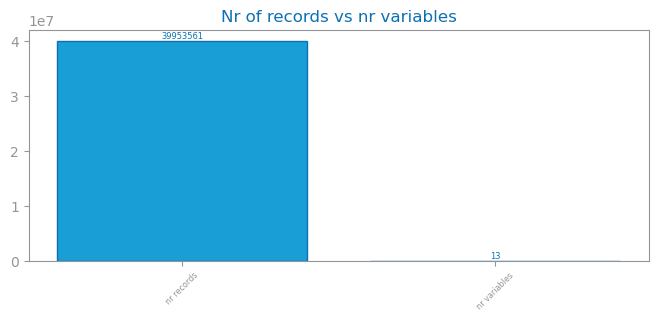

In [6]:
from matplotlib.pyplot import figure, savefig, show



figure(figsize=(8, 3)) #(largura,altura) 

values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}

#df_shape[0] - retorna o numero de linhas
#df_shape[1] - retorna o numero de colunas


plot_bar_chart(
    list(values.keys())\
    ,list(values.values())\
    ,title="Nr of records vs nr variables"
)
#savefig(f"images/{file_tag}_records_variables.png")
show()

### Missing values

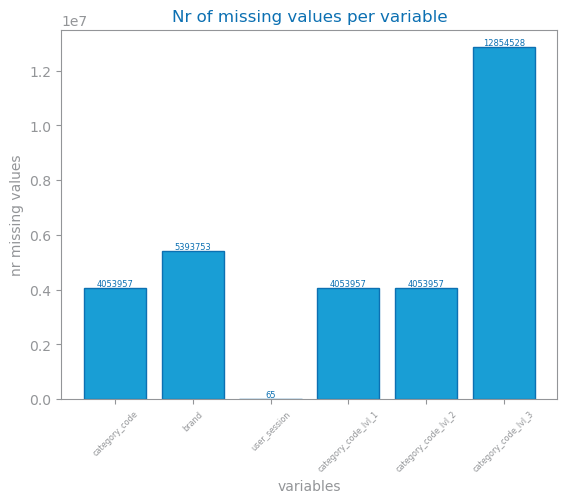

In [7]:

mv: dict[str, int] = {}
for var in df.columns:
    nr: int = df[var].isna().sum()

    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
#savefig(f"images/{file_tag}_mv.png")
show()

### Variables Type

In [8]:
df.dtypes

event_time              object
event_type              object
product_id               int64
category_id              int64
category_code           object
brand                   object
price                  float64
user_id                  int64
user_session            object
category_code_lvl_1     object
category_code_lvl_2     object
category_code_lvl_3     object
target                  object
dtype: object

In [9]:
# Convert the 'event_time' column to a datetime type, ensuring it is in UTC.
# This conversion is necessary because pandas may not automatically recognize the original format as a valid datetime type.

df['event_time'] = to_datetime(df['event_time'], errors='coerce', utc=True)
print(df['event_time'].dtype)


datetime64[ns, UTC]


In [10]:
df.dtypes

event_time             datetime64[ns, UTC]
event_type                          object
product_id                           int64
category_id                          int64
category_code                       object
brand                               object
price                              float64
user_id                              int64
user_session                        object
category_code_lvl_1                 object
category_code_lvl_2                 object
category_code_lvl_3                 object
target                              object
dtype: object

In [11]:
from pandas.api.types import is_datetime64_any_dtype, is_numeric_dtype
from pandas import Series

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types = {"numeric": [], "binary": [], "date": [], "symbolic": []}
    
    nr_values = df.nunique(axis=0, dropna=True)

    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
        elif is_numeric_dtype(df[c]):
            variable_types["numeric"].append(c)
        elif is_datetime64_any_dtype(df[c]):
            variable_types["date"].append(c)
        else:
            variable_types["symbolic"].append(c)

    return variable_types

In [12]:
get_variable_types(df)

{'numeric': ['product_id', 'category_id', 'price', 'user_id'],
 'binary': ['target'],
 'date': ['event_time'],
 'symbolic': ['event_type',
  'category_code',
  'brand',
  'user_session',
  'category_code_lvl_1',
  'category_code_lvl_2',
  'category_code_lvl_3']}

{'numeric': ['product_id', 'category_id', 'price', 'user_id'], 'binary': ['target'], 'date': ['event_time'], 'symbolic': ['event_type', 'category_code', 'brand', 'user_session', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3']}


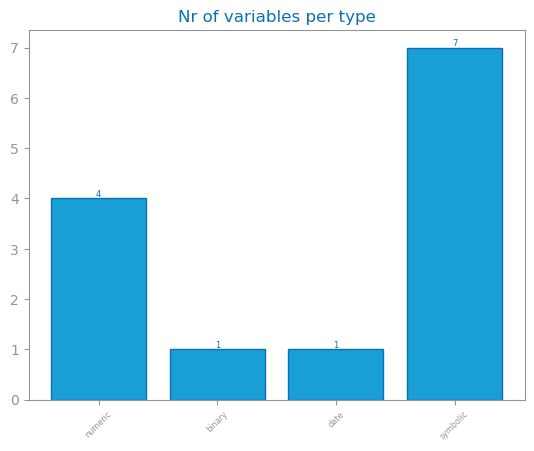

In [13]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show


variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])


Figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys())\
    ,list(counts.values())\
    ,title="Nr of variables per type"
)
show()

#### Change symbolic columns type, to category (instead of object)

In [14]:
symbolic: list[str] = variable_types["symbolic"]
df[symbolic] = df[symbolic].apply(lambda x: x.astype("category"))
df.dtypes

event_time             datetime64[ns, UTC]
event_type                        category
product_id                           int64
category_id                          int64
category_code                     category
brand                             category
price                              float64
user_id                              int64
user_session                      category
category_code_lvl_1               category
category_code_lvl_2               category
category_code_lvl_3               category
target                              object
dtype: object

## Distribuition

In [15]:

summary5: df = df.describe(include="all")
summary5

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,target
count,39953561,39953561,3.995356e+07,3.995356e+07,35899604,34559808,3.995356e+07,3.995356e+07,39953496,35899604,35899604,27099033,39953561
unique,NaN,3,NaN,NaN,141,4756,NaN,NaN,9805789,13,63,91,2
top,NaN,view,NaN,NaN,construction.tools.light,samsung,NaN,NaN,060b5762-741f-4825-94c5-d1b3e2f7bd27,construction,tools,light,not_purchase
freq,NaN,37412688,NaN,NaN,8594743,4802971,NaN,NaN,20584,10136094,9927189,8691334,39373127
mean,2020-04-17 14:11:45.523373312+00:00,NaN,3.518838e+07,2.180706e+18,NaN,NaN,2.733233e+02,5.827790e+08,NaN,NaN,NaN,NaN,NaN
min,2020-04-01 00:00:00+00:00,NaN,1.000365e+06,2.053014e+18,NaN,NaN,0.000000e+00,2.951588e+07,NaN,NaN,NaN,NaN,NaN
25%,2020-04-11 01:27:42+00:00,NaN,2.602138e+06,2.053014e+18,NaN,NaN,5.146000e+01,5.335135e+08,NaN,NaN,NaN,NaN,NaN
50%,2020-04-18 04:54:44+00:00,NaN,1.220091e+07,2.232732e+18,NaN,NaN,1.487800e+02,5.876208e+08,NaN,NaN,NaN,NaN,NaN
75%,2020-04-24 17:25:26+00:00,NaN,1.000224e+08,2.232732e+18,NaN,NaN,3.423500e+02,6.337847e+08,NaN,NaN,NaN,NaN,NaN
max,2020-04-30 23:59:59+00:00,NaN,1.002342e+08,2.298841e+18,NaN,NaN,2.574070e+03,6.497760e+08,NaN,NaN,NaN,NaN,NaN


In [17]:
var: str = "price"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tMean: ", summary5[var]["mean"])
print("\tStDev: ", summary5[var]["std"])
print("\tMin: ", summary5[var]["min"])
print("\tQ1: ", summary5[var]["25%"])
print("\tMedian: ", summary5[var]["50%"])
print("\tQ3: ", summary5[var]["75%"])
print("\tMax: ", summary5[var]["max"])

Summary for price variable:
	Count:  39953561.0
	Mean:  273.32334076779716
	StDev:  356.10839668397585
	Min:  0.0
	Q1:  51.46
	Median:  148.78
	Q3:  342.35
	Max:  2574.07


In [85]:
var = "category_code_lvl_1"
print(f"Summary for {var} variable:")
print("\tCount: ", summary5[var]["count"])
print("\tUnique: ", summary5[var]["unique"])
print("\tTop: ", summary5[var]["top"])
print("\tFreq: ", summary5[var]["freq"])


Summary for category_code_lvl_1 variable:
	Count:  5983550
	Unique:  13
	Top:  construction
	Freq:  1689325


### Numeric Values

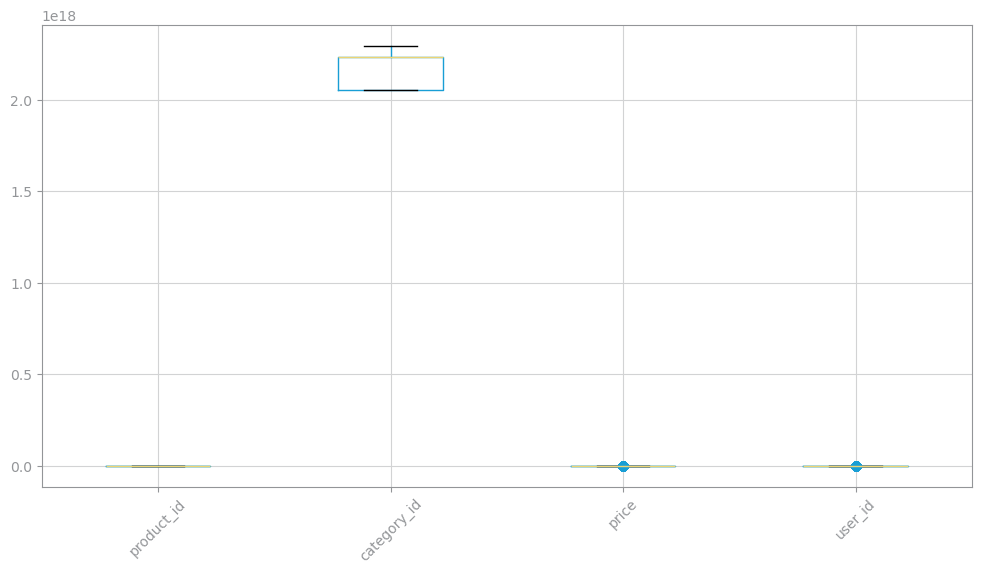

In [32]:
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types


variables_types: dict[str, list] = get_variable_types(df)

numeric: list[str] = variables_types["numeric"]
if [] != numeric: #verifica que a lista numeric não está vazia ([]). Se não estiver executa o codigo em baixo
    plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
    df[numeric].boxplot(rot=45)

    #savefig(f"images/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

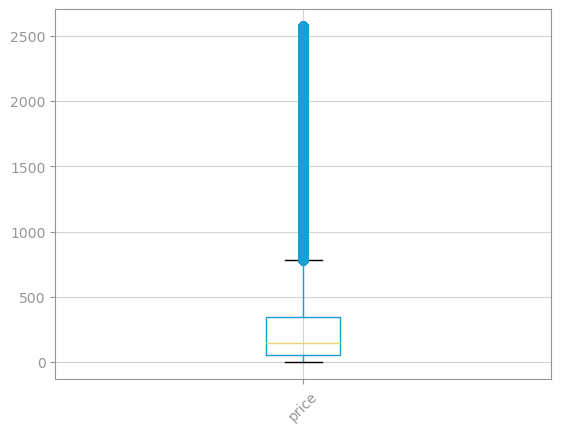

In [18]:
from matplotlib.pyplot import savefig, show


# variables_types: dict[str, list] = get_variable_types(data)
# numeric: list[str] = variables_types["numeric"]

# price is the only actual numeric variable as others are identifiers so might as well and filter for it
numeric: list[str] = ["price"]

if [] != numeric:
    df[numeric].boxplot(rot=45)
   # savefig(f"{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

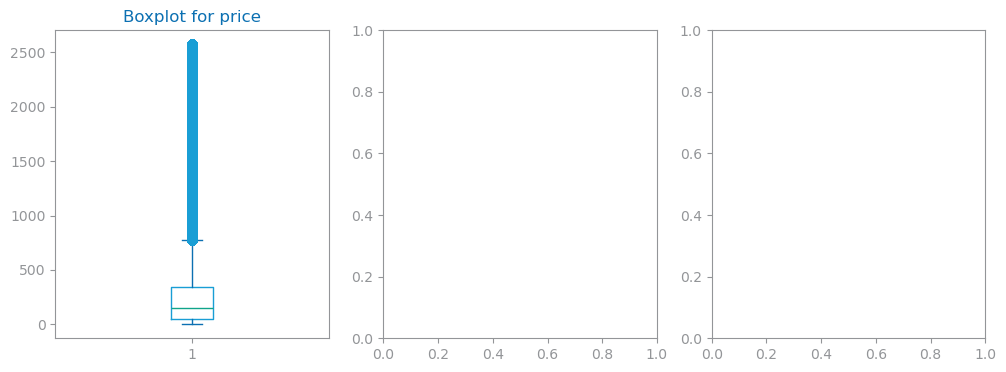

In [19]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(df[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

### Checking price distribuition for top selling category (Construction)

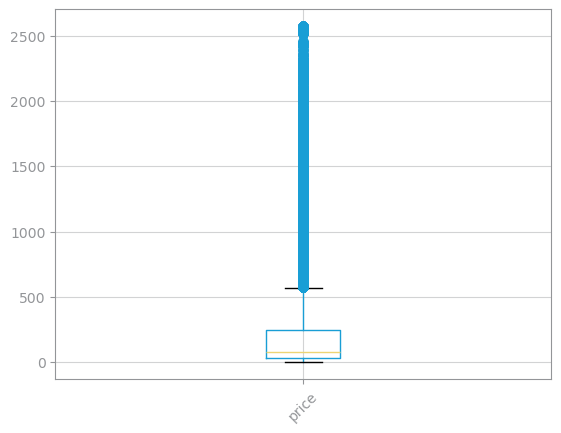

In [93]:
from matplotlib.pyplot import savefig, show


# variables_types: dict[str, list] = get_variable_types(data)
# numeric: list[str] = variables_types["numeric"]
df_filtered=df[ df['category_code_lvl_1']=='electronics']
# price is the only actual numeric variable as others are identifiers so might as well and filter for it
numeric: list[str] = ["price"]

if [] != numeric:
    df_filtered[numeric].boxplot(rot=45)
   # savefig(f"{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

### Checking outliers

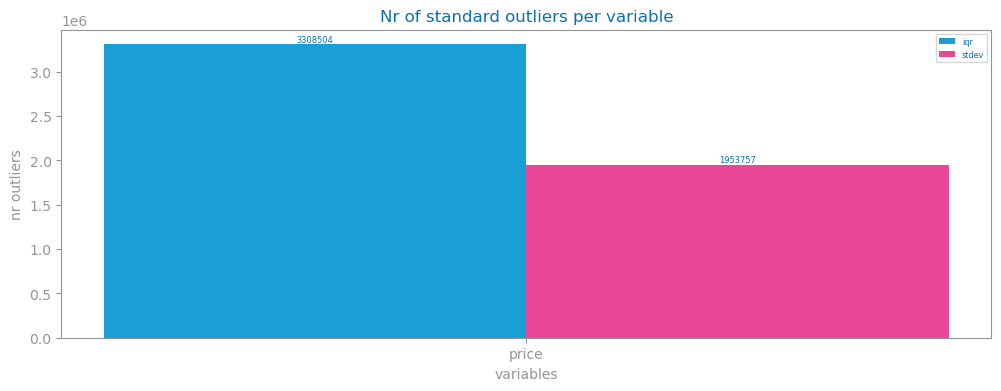

In [20]:
from pandas import Series
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_multibar_chart

#This is the number of times * Standartdeviation.  
#Outliers are defined as values that are a certain distance from the mean, determined by the number of standard deviations you specified
#the higher the nr_stdev_ less outliers ww will have
NR_STDEV: int = 2


IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom



def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = df[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    #savefig(f"images/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

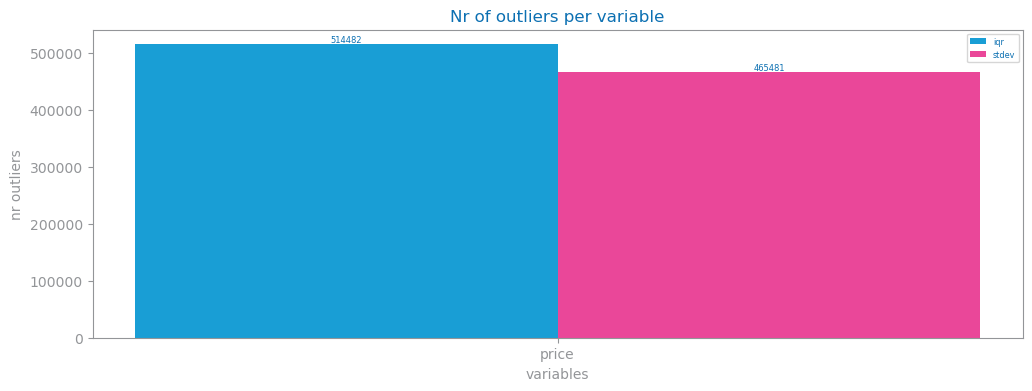

In [21]:
#Here we basically change the nr_stdev and iqr_factor, and we can seeh that the number of outliers decreased
if [] != numeric:
    outliers: dict[str, int] = count_outliers(df, numeric, nrstdev=4, iqrfactor=4.5)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    #savefig(f"images/{file_tag}_outliers.png")
    show()
else:
    print("There are no numeric variables.")

### histogram for distribuition

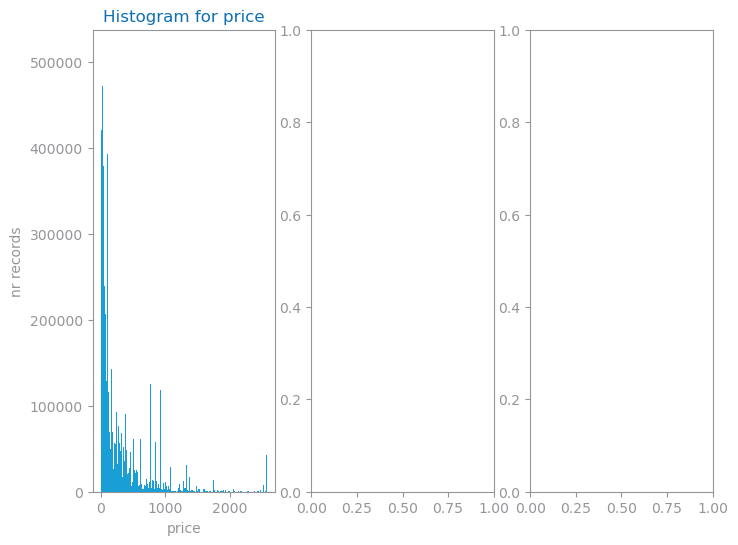

In [22]:
from dslabs_functions import set_chart_labels


if [] != numeric:
    fig, axs = subplots(
        #rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
        rows, cols, figsize=(8,6), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(df[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

In [ ]:
from dslabs_functions import set_chart_labels
import matplotlib.pyplot as plt

# Certificar-se de que a coluna 'price' está em formato numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verificar se a coluna 'price' existe no DataFrame e se é numérica
if 'price' in df.columns and df['price'].dtype in ['float64', 'int64']:
    fig, ax = plt.subplots(figsize=(8, 6))  # Tamanho do gráfico

    # Definir os rótulos do gráfico
    set_chart_labels(
        ax,
        title="Histogram for price",
        xlabel="price",
        ylabel="nr records"
    )
    
    # Gerar o histograma para a coluna 'price'
    ax.hist(df['price'].dropna().values, bins='auto')
    
    # Exibir o gráfico
    plt.show()
else:
    print("A coluna 'price' não está disponível ou não é numérica.")

In [23]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = lognorm.fit(x_values)
    distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
        x_values, sigma, loc, scale
    )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    ax.hist(values, 20, density=True)
    distributions: dict = compute_known_distributions(values)
    plot_multiline_chart(
        values,
        distributions,
        ax=ax,
        title="Best fit for %s" % var,
        xlabel=var,
        ylabel="",
    )


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], df[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")

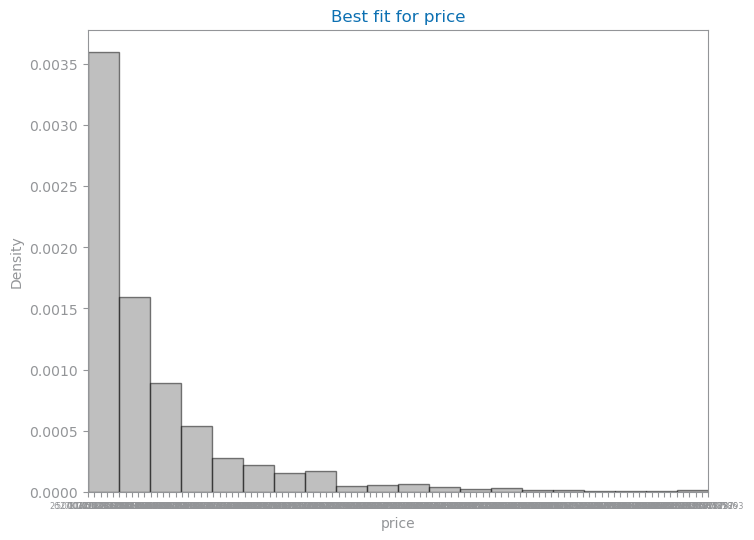

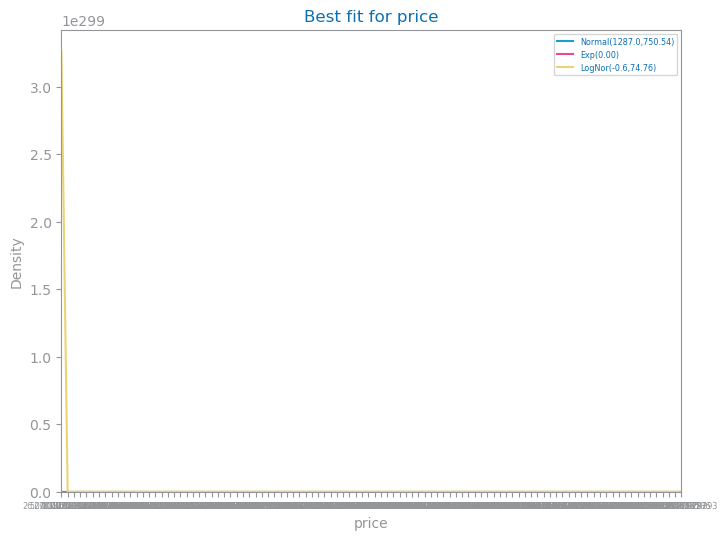

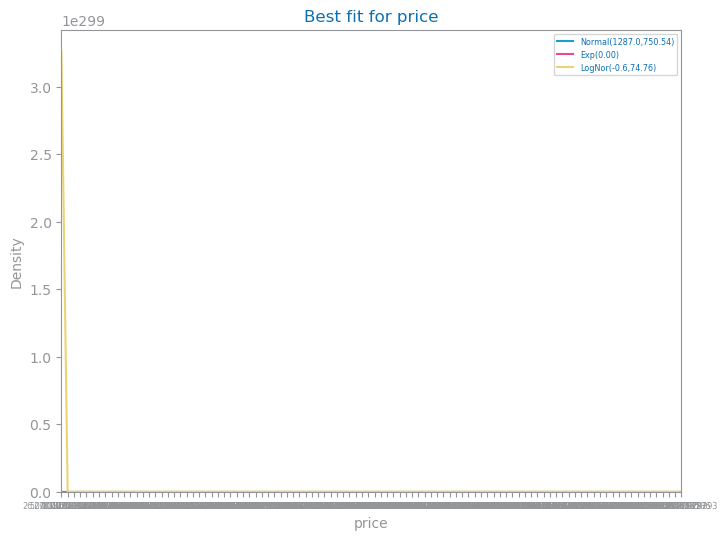

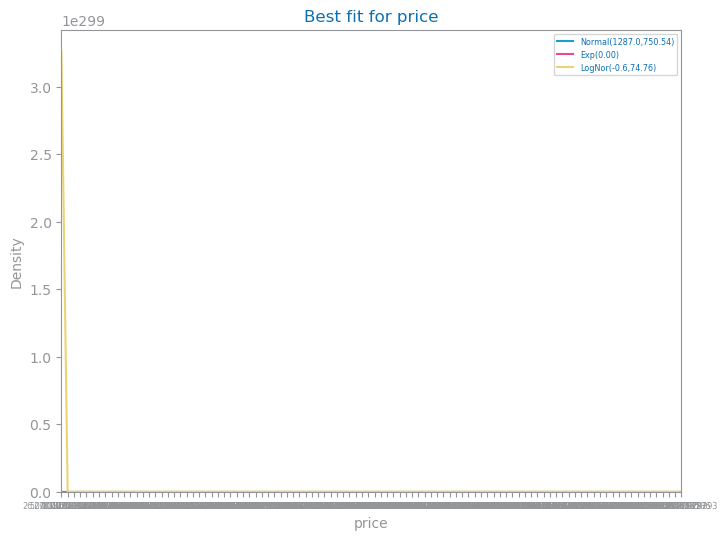

In [22]:
from numpy import log, linspace
from pandas import Series
from scipy.stats import norm, expon, lognorm
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from dslabs_functions import plot_multiline_chart

def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    
    # Gaussian
    mean, sigma = norm.fit(x_values)
    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
    
    # Exponential
    loc, scale = expon.fit(x_values)
    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
    
    # LogNorm
    shape, loc, scale = lognorm.fit(x_values)
    distributions["LogNor(%.1f,%.2f)" % (log(scale), shape)] = lognorm.pdf(x_values, shape, loc, scale)
    
    return distributions

def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    ax.hist(values, bins=20, density=True, alpha=0.5, color='gray', edgecolor='black')
    
    # Create x values for plotting the distribution lines
    min_val, max_val = min(values), max(values)
    x_values = linspace(min_val, max_val, 100)  # Generate 100 points in the range of the data
    distributions: dict = compute_known_distributions(x_values)  # Pass x_values instead of values
    
    # Plot the distributions
    plot_multiline_chart(
        x_values,
        distributions,
        ax=ax,
        title=f"Best fit for {var}",
        xlabel=var,
        ylabel="Density",
    )

# Focus on the column 'price'
price_column = 'price'

# Check if the 'price' column exists and is numeric
if price_column in df.columns and pd.api.types.is_numeric_dtype(df[price_column]):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Call the function to plot histogram with distributions
    histogram_with_distributions(ax, df[price_column].dropna(), price_column)
    
    #plt.savefig(f"images/{file_tag}_histogram_price_distribution.png")  # Save the figure
    plt.show()  # Display the plot
else:
    print("The 'price' column does not exist or is not numeric.")



### Symbolic variables

In [34]:
from dslabs_functions import plot_bar_chart

symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = df[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    #savefig(f"images/{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

KeyboardInterrupt: 

### Balancing and Class distribution


target
not_purchase    6562728
purchase          96199
Name: count, dtype: int64


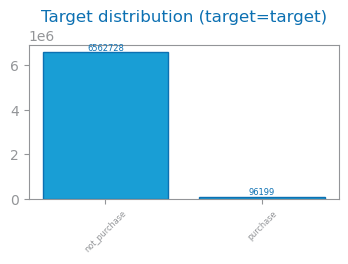

In [42]:
target = "target"

values: Series = df[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

## Granularity

In [44]:
def derive_date_variables(df: DataFrame, date_vars: list[str]) -> DataFrame:
    for date in date_vars:
        df[date + "_year"] = df[date].dt.year
        df[date + "_quarter"] = df[date].dt.quarter
        df[date + "_month"] = df[date].dt.month
        df[date + "_day"] = df[date].dt.day
    return df


TypeError: derive_date_variables() missing 1 required positional argument: 'date_vars'

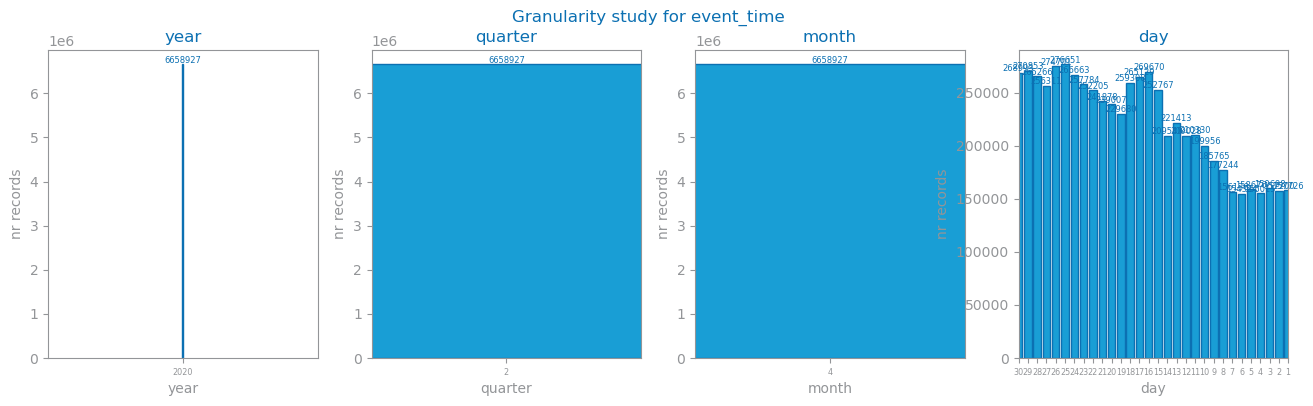

In [47]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
from dslabs_functions import get_variable_types, plot_bar_chart, HEIGHT


def analyse_date_granularity(data: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = data[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs

variables_types: dict[str, list] = get_variable_types(df)
data_ext: DataFrame = derive_date_variables(df, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(df, v_date, ["year", "quarter", "month", "day"])
    #savefig(f"images/{file_tag}_granularity_{v_date}.png")
    show()

## Sparsity

In [38]:
from numpy import ndarray
from pandas import read_csv, DataFrame
from matplotlib.figure import Figure
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart


df = df.dropna()

vars: list = df.columns.to_list()
if [] != vars:
    target = "stroke"

    n: int = len(vars) - 1
    fig: Figure
    axs: ndarray
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(df, var1, var2, ax=axs[i, j - 1])
    #savefig(f"images/{file_tag}_sparsity_study.png")
    show()
else:
    print("Sparsity class: there are no variables.")